<a href="https://colab.research.google.com/github/jnpos/group8_ECG/blob/Classifier/ECG_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/jveenland/tm10007_ml.git

Cloning into 'tm10007_ml'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 83 (delta 13), reused 12 (delta 12), pack-reused 62
Unpacking objects: 100% (83/83), 67.93 MiB | 12.34 MiB/s, done.


In [5]:
# General packages
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets as ds
from sklearn import metrics
import zipfile
import os
import pandas as pd

# Metrics
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import r2_score

# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection

In [6]:
with zipfile.ZipFile('/content/tm10007_ml/ecg/ecg_data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/tm10007_ml/ecg')

data = pd.read_csv('/content/tm10007_ml/ecg/ecg_data.csv', index_col=0)

print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')



The number of samples: 827
The number of columns: 9001


In [7]:
# Find column with label 
bool_cols = [col for col in data 
             if np.isin(data[col].dropna().unique(), [0, 1]).all()]
loc_label = data.columns.get_loc('label')

# Determine data and output 
y = data['label']
x = pd.DataFrame()
x = data.drop(data.columns[loc_label],axis=1)

# Split test and trainingsdata 
#sss = model_selection.StratifiedShuffleSplit(n_splits=20, test_size=0.5, random_state=0)
#sss.get_n_splits(X, y)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y,test_size=0.25,random_state=0,stratify=y)



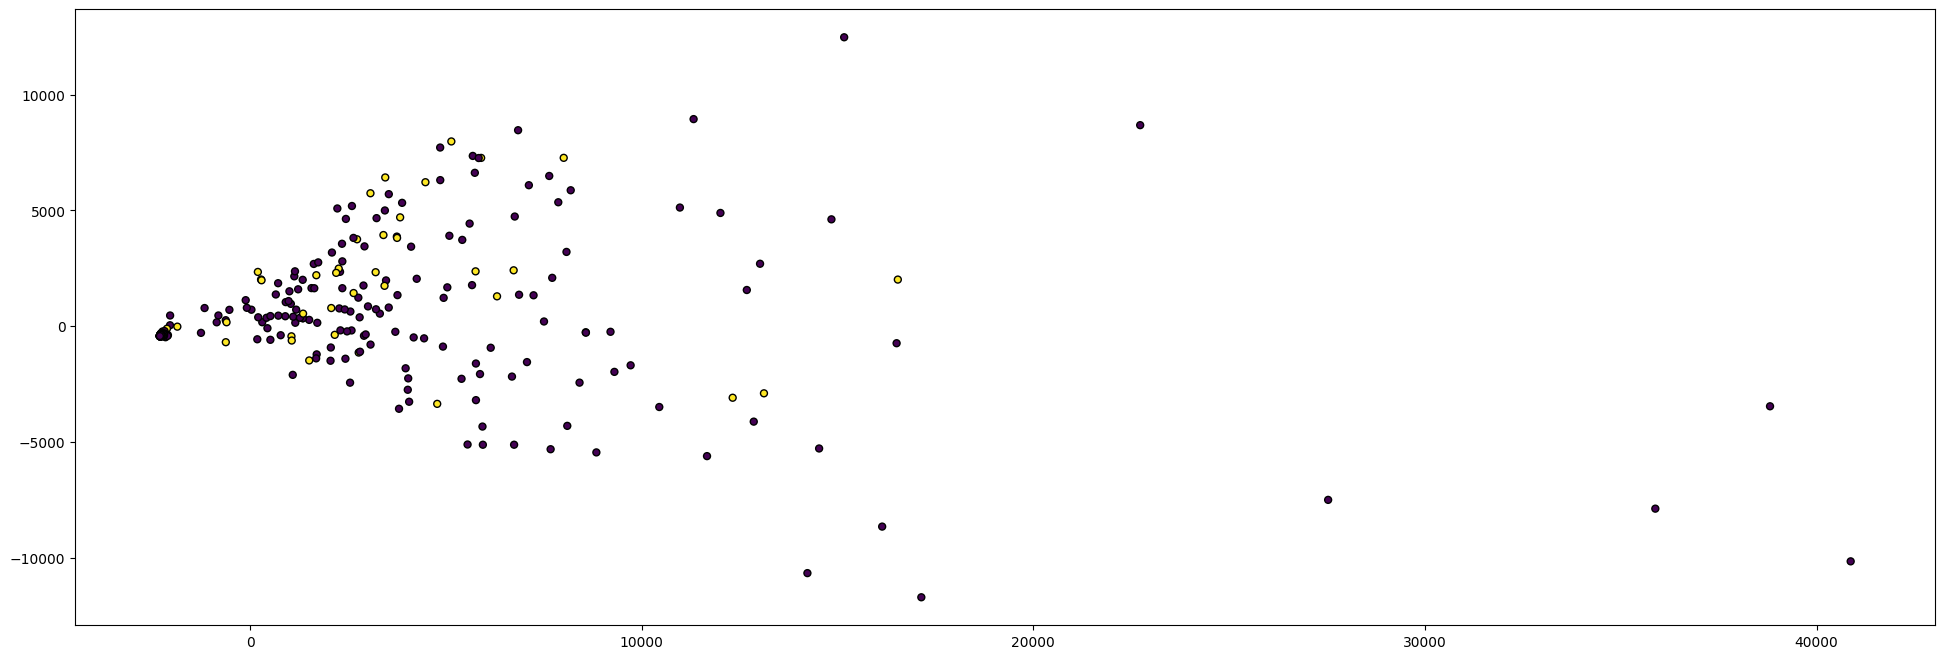

In [5]:
# Reduce dimensionality
n_features = 2

p = PCA(n_components=n_features)
p = p.fit(x_train)
x = p.transform(x_train)

fig = plt.figure(figsize=(24,8))
plt.scatter(x[:,0], x[:,1], marker='o', c=y_train, s=25, edgecolor = 'k')

**Linear support vector classification**

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import learning_curve
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
train_size_abs, train_scores, test_scores = learning_curve(clf, x_train, y_train, train_sizes=[0.2, 0.4, 0.6, 0.8])
for train_size, cv_train_scores, cv_test_scores in zip(train_size_abs, train_scores, test_scores):
    print(f"{train_size} samples were used to train the model")
    print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
    print(f"The average test accuracy is {cv_test_scores.mean():.2f}")

99 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.72
198 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.81
297 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.82
396 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.80


**k-NN**


In [16]:
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
train_size_abs, train_scores, test_scores = learning_curve(neigh, x_train, y_train, train_sizes=[0.2, 0.4, 0.6, 0.8])
for train_size, cv_train_scores, cv_test_scores in zip(train_size_abs, train_scores, test_scores):
    print(f"{train_size} samples were used to train the model")
    print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
    print(f"The average test accuracy is {cv_test_scores.mean():.2f}")

99 samples were used to train the model
The average train accuracy is 0.84
The average test accuracy is 0.81
198 samples were used to train the model
The average train accuracy is 0.85
The average test accuracy is 0.79
297 samples were used to train the model
The average train accuracy is 0.86
The average test accuracy is 0.82
396 samples were used to train the model
The average train accuracy is 0.86
The average test accuracy is 0.81


**Linear Discriminant Analysis**

In [16]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()

train_size_abs, train_scores, test_scores = learning_curve(clf, x_train, y_train, train_sizes=[0.2, 0.4, 0.6, 0.8])
for train_size, cv_train_scores, cv_test_scores in zip(train_size_abs, train_scores, test_scores):
    print(f"{train_size} samples were used to train the model")
    print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
    print(f"The average test accuracy is {cv_test_scores.mean():.2f}")

99 samples were used to train the model
The average train accuracy is 0.91
The average test accuracy is 0.83
198 samples were used to train the model
The average train accuracy is 0.92
The average test accuracy is 0.85
297 samples were used to train the model
The average train accuracy is 0.93
The average test accuracy is 0.85
396 samples were used to train the model
The average train accuracy is 0.94
The average test accuracy is 0.85


**Support Vector Classification**

In [8]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
train_size_abs, train_scores, test_scores = learning_curve(clf, x_train, y_train, train_sizes=[0.2, 0.4, 0.6, 0.8])
for train_size, cv_train_scores, cv_test_scores in zip(train_size_abs, train_scores, test_scores):
    print(f"{train_size} samples were used to train the model")
    print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
    print(f"The average test accuracy is {cv_test_scores.mean():.2f}")


99 samples were used to train the model
The average train accuracy is 0.83
The average test accuracy is 0.82
198 samples were used to train the model
The average train accuracy is 0.83
The average test accuracy is 0.82
297 samples were used to train the model
The average train accuracy is 0.83
The average test accuracy is 0.82
396 samples were used to train the model
The average train accuracy is 0.85
The average test accuracy is 0.83


**Learning curve k-NN and SVC**

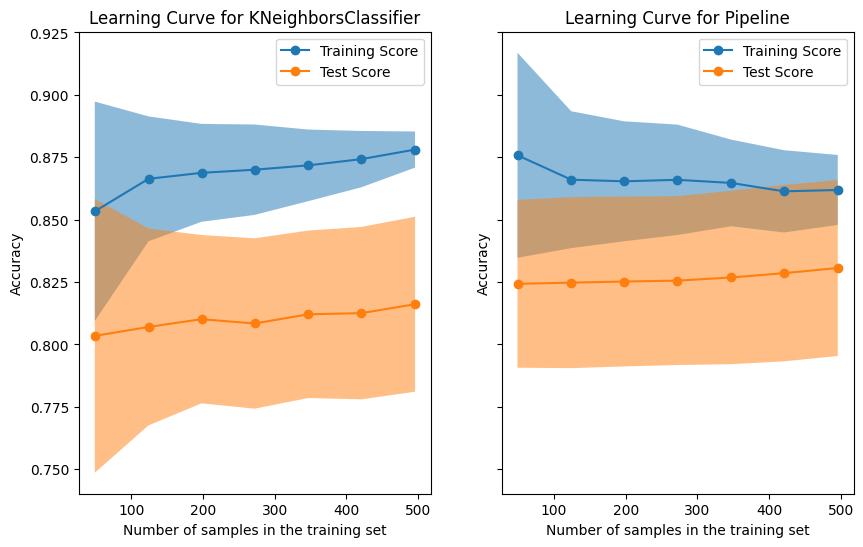

In [20]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": x_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([neigh, svc]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

**Learning curve Linear discriminant analyssi and k-NN**

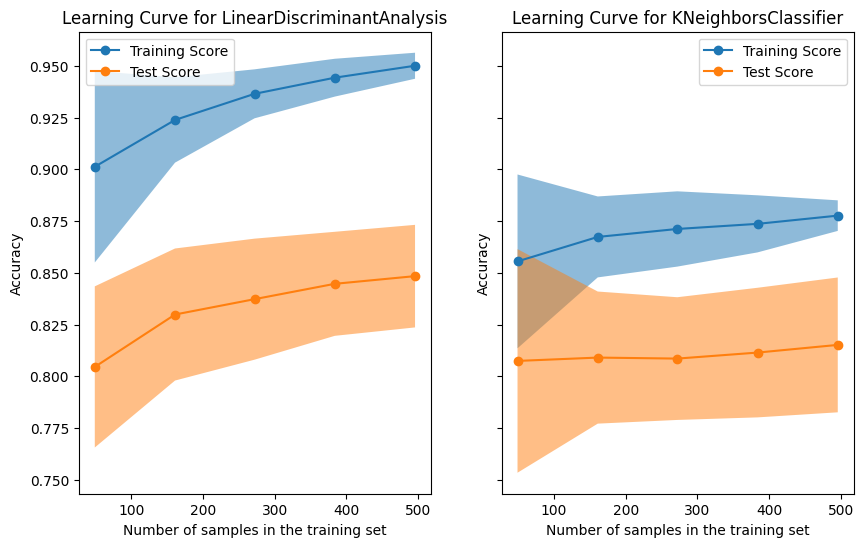

In [17]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
neigh = KNeighborsClassifier(n_neighbors=3)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": x_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([lda, neigh]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")